In [8]:
import torch
import torch.nn as nn

from ResNet.dataloader import data_loader

data_dir = r"data"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

out_neurons = 1
num_epochs = 100
batch_size = 64
learning_rate = 0.0001
patience = 9

train_loader, valid_loader, _, _ = data_loader(
    data_dir=data_dir,
    batch_size=batch_size,
    num_workers=4,
    pin_memory=True,
)

test_loader = data_loader(
    data_dir=data_dir,
    batch_size=batch_size,
    test=True,
    num_workers=4,
    pin_memory=True,
)

In [9]:
from torchsummary import summary

from ResNet.ResNet import ResNet18
from ResNet.experiment import Experiment

resnet18 = ResNet18(out_neurons=1).to(device)
experiment_18_dir = "ResNet-18"
experiment_18 = Experiment(experiment_18_dir, resnet18, device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    resnet18.parameters(),
    lr=learning_rate,
    weight_decay=0.001,
    momentum=0.9,
)

summary(
    resnet18,
    input_size=(3, 224, 224),
    device="cuda" if torch.cuda.is_available() else "cpu",
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,928
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,928
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
            Block-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,928
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [10]:
experiment_18.train_model(
    num_epochs,
    criterion,
    optimizer,
    train_loader,
    valid_loader,
    patience,
)

Epoch 1/100: 100%|██████████| 83/83 [00:27<00:00,  3.01batch/s, train_loss=0.662]


Epoch [1/100] | Train Loss: 0.6619, Train Acc: 59.77%, Prec: 0.6113, Rec: 0.7793, F1: 0.6851 | Valid Loss: 0.6024, Valid Acc: 75.41%, Prec: 0.7137, Rec: 0.9691, F1: 0.8221
New --best--validation--loss = 0.60238079 at epoch 0


Epoch 2/100: 100%|██████████| 83/83 [00:25<00:00,  3.24batch/s, train_loss=0.547]


Epoch [2/100] | Train Loss: 0.5470, Train Acc: 79.61%, Prec: 0.7553, Rec: 0.9423, F1: 0.8385 | Valid Loss: 0.4681, Valid Acc: 88.61%, Prec: 0.9023, Rec: 0.9035, F1: 0.9029
New --best--validation--loss = 0.46813591 at epoch 1


Epoch 3/100: 100%|██████████| 83/83 [00:25<00:00,  3.29batch/s, train_loss=0.41]


Epoch [3/100] | Train Loss: 0.4102, Train Acc: 87.02%, Prec: 0.8575, Rec: 0.9222, F1: 0.8886 | Valid Loss: 0.3447, Valid Acc: 89.97%, Prec: 0.9118, Rec: 0.9176, F1: 0.9147
New --best--validation--loss = 0.34466746 at epoch 2


Epoch 4/100: 100%|██████████| 83/83 [00:26<00:00,  3.18batch/s, train_loss=0.33]


Epoch [4/100] | Train Loss: 0.3301, Train Acc: 89.73%, Prec: 0.9025, Rec: 0.9161, F1: 0.9093 | Valid Loss: 0.2947, Valid Acc: 91.25%, Prec: 0.9232, Rec: 0.9279, F1: 0.9255
New --best--validation--loss = 0.29467667 at epoch 3


Epoch 5/100: 100%|██████████| 83/83 [00:25<00:00,  3.29batch/s, train_loss=0.292]


Epoch [5/100] | Train Loss: 0.2919, Train Acc: 91.03%, Prec: 0.9127, Rec: 0.9292, F1: 0.9209 | Valid Loss: 0.2591, Valid Acc: 92.53%, Prec: 0.9302, Rec: 0.9434, F1: 0.9367
New --best--validation--loss = 0.25914176 at epoch 4


Epoch 6/100: 100%|██████████| 83/83 [00:24<00:00,  3.35batch/s, train_loss=0.252]


Epoch [6/100] | Train Loss: 0.2518, Train Acc: 92.56%, Prec: 0.9287, Rec: 0.9396, F1: 0.9341 | Valid Loss: 0.2327, Valid Acc: 93.51%, Prec: 0.9335, Rec: 0.9575, F1: 0.9454
New --best--validation--loss = 0.23267189 at epoch 5


Epoch 7/100: 100%|██████████| 83/83 [00:24<00:00,  3.34batch/s, train_loss=0.216]


Epoch [7/100] | Train Loss: 0.2164, Train Acc: 93.80%, Prec: 0.9411, Rec: 0.9490, F1: 0.9450 | Valid Loss: 0.2201, Valid Acc: 93.97%, Prec: 0.9235, Rec: 0.9781, F1: 0.9500
New --best--validation--loss = 0.22011527 at epoch 6


Epoch 8/100: 100%|██████████| 83/83 [00:25<00:00,  3.26batch/s, train_loss=0.176]


Epoch [8/100] | Train Loss: 0.1760, Train Acc: 95.44%, Prec: 0.9597, Rec: 0.9591, F1: 0.9594 | Valid Loss: 0.2940, Valid Acc: 85.90%, Prec: 0.8105, Rec: 0.9910, F1: 0.8917


Epoch 9/100: 100%|██████████| 83/83 [00:25<00:00,  3.24batch/s, train_loss=0.146]


Epoch [9/100] | Train Loss: 0.1463, Train Acc: 96.63%, Prec: 0.9733, Rec: 0.9665, F1: 0.9699 | Valid Loss: 0.1485, Valid Acc: 96.30%, Prec: 0.9584, Rec: 0.9794, F1: 0.9688
New --best--validation--loss = 0.14846405 at epoch 8


Epoch 10/100: 100%|██████████| 83/83 [00:25<00:00,  3.28batch/s, train_loss=0.115]


Epoch [10/100] | Train Loss: 0.1146, Train Acc: 97.42%, Prec: 0.9833, Rec: 0.9705, F1: 0.9769 | Valid Loss: 0.1156, Valid Acc: 97.06%, Prec: 0.9780, Rec: 0.9717, F1: 0.9748
New --best--validation--loss = 0.11561276 at epoch 9


Epoch 11/100: 100%|██████████| 83/83 [00:24<00:00,  3.36batch/s, train_loss=0.0981]


Epoch [11/100] | Train Loss: 0.0981, Train Acc: 97.76%, Prec: 0.9881, Rec: 0.9718, F1: 0.9799 | Valid Loss: 0.1019, Valid Acc: 97.21%, Prec: 0.9731, Rec: 0.9794, F1: 0.9763
New --best--validation--loss = 0.10190835 at epoch 10


Epoch 12/100: 100%|██████████| 83/83 [00:24<00:00,  3.34batch/s, train_loss=0.0779]


Epoch [12/100] | Train Loss: 0.0779, Train Acc: 98.36%, Prec: 0.9932, Rec: 0.9775, F1: 0.9853 | Valid Loss: 0.0762, Valid Acc: 98.34%, Prec: 0.9846, Rec: 0.9871, F1: 0.9859
New --best--validation--loss = 0.07615166 at epoch 11


Epoch 13/100: 100%|██████████| 83/83 [00:25<00:00,  3.27batch/s, train_loss=0.065]


Epoch [13/100] | Train Loss: 0.0650, Train Acc: 98.55%, Prec: 0.9946, Rec: 0.9795, F1: 0.9870 | Valid Loss: 0.0665, Valid Acc: 98.64%, Prec: 0.9935, Rec: 0.9833, F1: 0.9884
New --best--validation--loss = 0.06647792 at epoch 12


Epoch 14/100: 100%|██████████| 83/83 [00:25<00:00,  3.24batch/s, train_loss=0.0538]


Epoch [14/100] | Train Loss: 0.0538, Train Acc: 99.13%, Prec: 0.9976, Rec: 0.9869, F1: 0.9922 | Valid Loss: 0.0553, Valid Acc: 98.94%, Prec: 0.9974, Rec: 0.9846, F1: 0.9909
New --best--validation--loss = 0.05527524 at epoch 13


Epoch 15/100: 100%|██████████| 83/83 [00:24<00:00,  3.32batch/s, train_loss=0.0459]


Epoch [15/100] | Train Loss: 0.0459, Train Acc: 99.15%, Prec: 0.9980, Rec: 0.9869, F1: 0.9924 | Valid Loss: 0.0559, Valid Acc: 98.49%, Prec: 1.0000, Rec: 0.9743, F1: 0.9870


Epoch 16/100: 100%|██████████| 83/83 [00:25<00:00,  3.23batch/s, train_loss=0.0372]


Epoch [16/100] | Train Loss: 0.0372, Train Acc: 99.36%, Prec: 0.9997, Rec: 0.9889, F1: 0.9943 | Valid Loss: 0.1999, Valid Acc: 93.14%, Prec: 0.9928, Rec: 0.8893, F1: 0.9382


Epoch 17/100: 100%|██████████| 83/83 [00:25<00:00,  3.27batch/s, train_loss=0.0313]


Epoch [17/100] | Train Loss: 0.0313, Train Acc: 99.45%, Prec: 0.9966, Rec: 0.9936, F1: 0.9951 | Valid Loss: 0.0666, Valid Acc: 98.42%, Prec: 0.9834, Rec: 0.9897, F1: 0.9865


Epoch 18/100: 100%|██████████| 83/83 [00:25<00:00,  3.31batch/s, train_loss=0.0253]


Epoch [18/100] | Train Loss: 0.0253, Train Acc: 99.66%, Prec: 0.9993, Rec: 0.9946, F1: 0.9970 | Valid Loss: 0.0408, Valid Acc: 99.32%, Prec: 0.9961, Rec: 0.9923, F1: 0.9942
New --best--validation--loss = 0.04082079 at epoch 17


Epoch 19/100: 100%|██████████| 83/83 [00:25<00:00,  3.23batch/s, train_loss=0.0222]


Epoch [19/100] | Train Loss: 0.0222, Train Acc: 99.76%, Prec: 0.9993, Rec: 0.9963, F1: 0.9978 | Valid Loss: 0.0371, Valid Acc: 99.47%, Prec: 0.9961, Rec: 0.9949, F1: 0.9955
New --best--validation--loss = 0.03707734 at epoch 18


Epoch 20/100: 100%|██████████| 83/83 [00:25<00:00,  3.28batch/s, train_loss=0.0191]


Epoch [20/100] | Train Loss: 0.0191, Train Acc: 99.76%, Prec: 0.9997, Rec: 0.9960, F1: 0.9978 | Valid Loss: 0.0292, Valid Acc: 99.32%, Prec: 0.9987, Rec: 0.9897, F1: 0.9942
New --best--validation--loss = 0.02923018 at epoch 19


Epoch 21/100: 100%|██████████| 83/83 [00:25<00:00,  3.24batch/s, train_loss=0.0173]


Epoch [21/100] | Train Loss: 0.0173, Train Acc: 99.77%, Prec: 0.9997, Rec: 0.9963, F1: 0.9980 | Valid Loss: 0.0304, Valid Acc: 99.55%, Prec: 1.0000, Rec: 0.9923, F1: 0.9961


Epoch 22/100: 100%|██████████| 83/83 [00:25<00:00,  3.32batch/s, train_loss=0.0147]


Epoch [22/100] | Train Loss: 0.0147, Train Acc: 99.91%, Prec: 1.0000, Rec: 0.9983, F1: 0.9992 | Valid Loss: 0.0344, Valid Acc: 99.25%, Prec: 0.9910, Rec: 0.9961, F1: 0.9936


Epoch 23/100: 100%|██████████| 83/83 [00:25<00:00,  3.20batch/s, train_loss=0.0147]


Epoch [23/100] | Train Loss: 0.0147, Train Acc: 99.85%, Prec: 1.0000, Rec: 0.9973, F1: 0.9987 | Valid Loss: 0.0237, Valid Acc: 99.47%, Prec: 0.9987, Rec: 0.9923, F1: 0.9955
New --best--validation--loss = 0.02371329 at epoch 22


Epoch 24/100: 100%|██████████| 83/83 [00:25<00:00,  3.24batch/s, train_loss=0.0115]


Epoch [24/100] | Train Loss: 0.0115, Train Acc: 99.91%, Prec: 0.9997, Rec: 0.9987, F1: 0.9992 | Valid Loss: 0.0237, Valid Acc: 99.40%, Prec: 0.9987, Rec: 0.9910, F1: 0.9948
New --best--validation--loss = 0.0236879 at epoch 23


Epoch 25/100: 100%|██████████| 83/83 [00:24<00:00,  3.32batch/s, train_loss=0.00912]


Epoch [25/100] | Train Loss: 0.0091, Train Acc: 99.96%, Prec: 1.0000, Rec: 0.9993, F1: 0.9997 | Valid Loss: 0.0236, Valid Acc: 99.62%, Prec: 0.9987, Rec: 0.9949, F1: 0.9968
New --best--validation--loss = 0.02360992 at epoch 24


Epoch 26/100: 100%|██████████| 83/83 [00:24<00:00,  3.34batch/s, train_loss=0.0117]


Epoch [26/100] | Train Loss: 0.0117, Train Acc: 99.85%, Prec: 1.0000, Rec: 0.9973, F1: 0.9987 | Valid Loss: 0.0249, Valid Acc: 99.62%, Prec: 1.0000, Rec: 0.9936, F1: 0.9968


Epoch 27/100: 100%|██████████| 83/83 [00:24<00:00,  3.34batch/s, train_loss=0.00808]


Epoch [27/100] | Train Loss: 0.0081, Train Acc: 99.94%, Prec: 1.0000, Rec: 0.9990, F1: 0.9995 | Valid Loss: 0.0240, Valid Acc: 99.32%, Prec: 0.9987, Rec: 0.9897, F1: 0.9942


Epoch 28/100: 100%|██████████| 83/83 [00:25<00:00,  3.30batch/s, train_loss=0.00764]


Epoch [28/100] | Train Loss: 0.0076, Train Acc: 99.91%, Prec: 0.9993, Rec: 0.9990, F1: 0.9992 | Valid Loss: 0.0211, Valid Acc: 99.62%, Prec: 0.9987, Rec: 0.9949, F1: 0.9968
New --best--validation--loss = 0.02106591 at epoch 27


Epoch 29/100: 100%|██████████| 83/83 [00:25<00:00,  3.31batch/s, train_loss=0.0079]


Epoch [29/100] | Train Loss: 0.0079, Train Acc: 99.94%, Prec: 0.9997, Rec: 0.9993, F1: 0.9995 | Valid Loss: 0.0223, Valid Acc: 99.70%, Prec: 1.0000, Rec: 0.9949, F1: 0.9974


Epoch 30/100: 100%|██████████| 83/83 [00:24<00:00,  3.35batch/s, train_loss=0.008]


Epoch [30/100] | Train Loss: 0.0080, Train Acc: 99.92%, Prec: 0.9993, Rec: 0.9993, F1: 0.9993 | Valid Loss: 0.0407, Valid Acc: 99.17%, Prec: 1.0000, Rec: 0.9858, F1: 0.9929


Epoch 31/100: 100%|██████████| 83/83 [00:24<00:00,  3.34batch/s, train_loss=0.00702]


Epoch [31/100] | Train Loss: 0.0070, Train Acc: 99.94%, Prec: 0.9997, Rec: 0.9993, F1: 0.9995 | Valid Loss: 0.0246, Valid Acc: 99.32%, Prec: 0.9987, Rec: 0.9897, F1: 0.9942


Epoch 32/100: 100%|██████████| 83/83 [00:24<00:00,  3.35batch/s, train_loss=0.0081]


Epoch [32/100] | Train Loss: 0.0081, Train Acc: 99.92%, Prec: 1.0000, Rec: 0.9987, F1: 0.9993 | Valid Loss: 0.0179, Valid Acc: 99.62%, Prec: 0.9987, Rec: 0.9949, F1: 0.9968
New --best--validation--loss = 0.01794404 at epoch 31


Epoch 33/100: 100%|██████████| 83/83 [00:24<00:00,  3.36batch/s, train_loss=0.00574]


Epoch [33/100] | Train Loss: 0.0057, Train Acc: 99.96%, Prec: 0.9997, Rec: 0.9997, F1: 0.9997 | Valid Loss: 0.0189, Valid Acc: 99.62%, Prec: 1.0000, Rec: 0.9936, F1: 0.9968


Epoch 34/100: 100%|██████████| 83/83 [00:24<00:00,  3.35batch/s, train_loss=0.00621]


Epoch [34/100] | Train Loss: 0.0062, Train Acc: 99.91%, Prec: 0.9997, Rec: 0.9987, F1: 0.9992 | Valid Loss: 0.0185, Valid Acc: 99.55%, Prec: 0.9987, Rec: 0.9936, F1: 0.9961


Epoch 35/100: 100%|██████████| 83/83 [00:24<00:00,  3.35batch/s, train_loss=0.0056]


Epoch [35/100] | Train Loss: 0.0056, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0288, Valid Acc: 99.62%, Prec: 0.9961, Rec: 0.9974, F1: 0.9968


Epoch 36/100: 100%|██████████| 83/83 [00:24<00:00,  3.34batch/s, train_loss=0.00677]


Epoch [36/100] | Train Loss: 0.0068, Train Acc: 99.92%, Prec: 0.9997, Rec: 0.9990, F1: 0.9993 | Valid Loss: 0.0281, Valid Acc: 99.32%, Prec: 0.9923, Rec: 0.9961, F1: 0.9942


Epoch 37/100: 100%|██████████| 83/83 [00:24<00:00,  3.33batch/s, train_loss=0.0048]


Epoch [37/100] | Train Loss: 0.0048, Train Acc: 99.96%, Prec: 0.9997, Rec: 0.9997, F1: 0.9997 | Valid Loss: 0.0210, Valid Acc: 99.62%, Prec: 0.9987, Rec: 0.9949, F1: 0.9968


Epoch 38/100: 100%|██████████| 83/83 [00:25<00:00,  3.29batch/s, train_loss=0.00483]


Epoch [38/100] | Train Loss: 0.0048, Train Acc: 99.96%, Prec: 1.0000, Rec: 0.9993, F1: 0.9997 | Valid Loss: 0.0201, Valid Acc: 99.62%, Prec: 1.0000, Rec: 0.9936, F1: 0.9968


Epoch 39/100: 100%|██████████| 83/83 [00:25<00:00,  3.24batch/s, train_loss=0.00441]


Epoch [39/100] | Train Loss: 0.0044, Train Acc: 99.98%, Prec: 1.0000, Rec: 0.9997, F1: 0.9998 | Valid Loss: 0.0235, Valid Acc: 99.55%, Prec: 1.0000, Rec: 0.9923, F1: 0.9961


Epoch 40/100: 100%|██████████| 83/83 [00:25<00:00,  3.32batch/s, train_loss=0.00409]


Epoch [40/100] | Train Loss: 0.0041, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0170, Valid Acc: 99.62%, Prec: 1.0000, Rec: 0.9936, F1: 0.9968
New --best--validation--loss = 0.01700445 at epoch 39


Epoch 41/100: 100%|██████████| 83/83 [00:24<00:00,  3.37batch/s, train_loss=0.00426]


Epoch [41/100] | Train Loss: 0.0043, Train Acc: 99.96%, Prec: 0.9997, Rec: 0.9997, F1: 0.9997 | Valid Loss: 0.0202, Valid Acc: 99.55%, Prec: 0.9987, Rec: 0.9936, F1: 0.9961


Epoch 42/100: 100%|██████████| 83/83 [00:24<00:00,  3.35batch/s, train_loss=0.00478]


Epoch [42/100] | Train Loss: 0.0048, Train Acc: 99.98%, Prec: 1.0000, Rec: 0.9997, F1: 0.9998 | Valid Loss: 0.0314, Valid Acc: 99.25%, Prec: 1.0000, Rec: 0.9871, F1: 0.9935


Epoch 43/100: 100%|██████████| 83/83 [00:25<00:00,  3.29batch/s, train_loss=0.00427]


Epoch [43/100] | Train Loss: 0.0043, Train Acc: 99.96%, Prec: 1.0000, Rec: 0.9993, F1: 0.9997 | Valid Loss: 0.0170, Valid Acc: 99.62%, Prec: 1.0000, Rec: 0.9936, F1: 0.9968
New --best--validation--loss = 0.01696319 at epoch 42


Epoch 44/100: 100%|██████████| 83/83 [00:25<00:00,  3.30batch/s, train_loss=0.00345]


Epoch [44/100] | Train Loss: 0.0035, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0162, Valid Acc: 99.62%, Prec: 0.9987, Rec: 0.9949, F1: 0.9968
New --best--validation--loss = 0.01620531 at epoch 43


Epoch 45/100: 100%|██████████| 83/83 [00:24<00:00,  3.39batch/s, train_loss=0.00303]


Epoch [45/100] | Train Loss: 0.0030, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0146, Valid Acc: 99.70%, Prec: 1.0000, Rec: 0.9949, F1: 0.9974
New --best--validation--loss = 0.01457393 at epoch 44


Epoch 46/100: 100%|██████████| 83/83 [00:25<00:00,  3.27batch/s, train_loss=0.00309]


Epoch [46/100] | Train Loss: 0.0031, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0192, Valid Acc: 99.62%, Prec: 1.0000, Rec: 0.9936, F1: 0.9968


Epoch 47/100: 100%|██████████| 83/83 [00:25<00:00,  3.26batch/s, train_loss=0.0031]


Epoch [47/100] | Train Loss: 0.0031, Train Acc: 99.98%, Prec: 1.0000, Rec: 0.9997, F1: 0.9998 | Valid Loss: 0.0152, Valid Acc: 99.62%, Prec: 0.9987, Rec: 0.9949, F1: 0.9968


Epoch 48/100: 100%|██████████| 83/83 [00:24<00:00,  3.34batch/s, train_loss=0.00242]


Epoch [48/100] | Train Loss: 0.0024, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0159, Valid Acc: 99.70%, Prec: 1.0000, Rec: 0.9949, F1: 0.9974


Epoch 49/100: 100%|██████████| 83/83 [00:25<00:00,  3.28batch/s, train_loss=0.00253]


Epoch [49/100] | Train Loss: 0.0025, Train Acc: 99.98%, Prec: 1.0000, Rec: 0.9997, F1: 0.9998 | Valid Loss: 0.0164, Valid Acc: 99.70%, Prec: 0.9987, Rec: 0.9961, F1: 0.9974


Epoch 50/100: 100%|██████████| 83/83 [00:25<00:00,  3.32batch/s, train_loss=0.00318]


Epoch [50/100] | Train Loss: 0.0032, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0155, Valid Acc: 99.62%, Prec: 0.9987, Rec: 0.9949, F1: 0.9968


Epoch 51/100: 100%|██████████| 83/83 [00:25<00:00,  3.26batch/s, train_loss=0.0023]


Epoch [51/100] | Train Loss: 0.0023, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0158, Valid Acc: 99.62%, Prec: 0.9987, Rec: 0.9949, F1: 0.9968


Epoch 52/100: 100%|██████████| 83/83 [00:24<00:00,  3.32batch/s, train_loss=0.00198]


Epoch [52/100] | Train Loss: 0.0020, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0185, Valid Acc: 99.70%, Prec: 1.0000, Rec: 0.9949, F1: 0.9974


Epoch 53/100: 100%|██████████| 83/83 [00:24<00:00,  3.35batch/s, train_loss=0.00274]


Epoch [53/100] | Train Loss: 0.0027, Train Acc: 99.96%, Prec: 0.9997, Rec: 0.9997, F1: 0.9997 | Valid Loss: 0.0169, Valid Acc: 99.70%, Prec: 1.0000, Rec: 0.9949, F1: 0.9974


Epoch 54/100: 100%|██████████| 83/83 [00:25<00:00,  3.32batch/s, train_loss=0.00231]


Epoch [54/100] | Train Loss: 0.0023, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0164, Valid Acc: 99.70%, Prec: 1.0000, Rec: 0.9949, F1: 0.9974
Early stopping triggered at epoch 54.


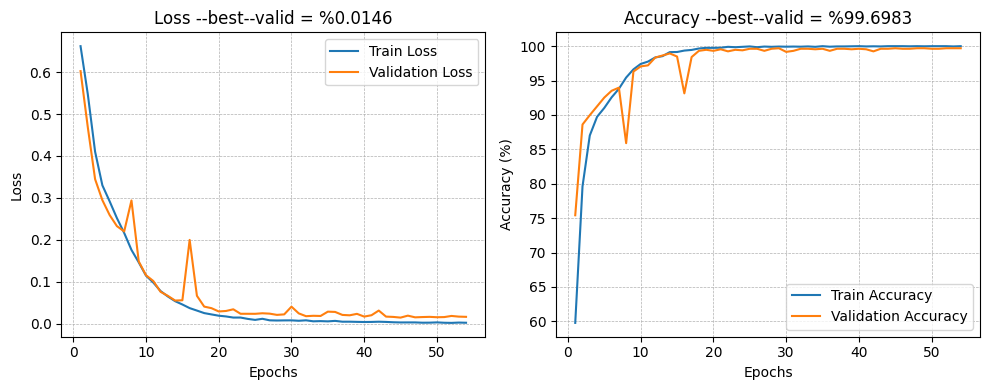

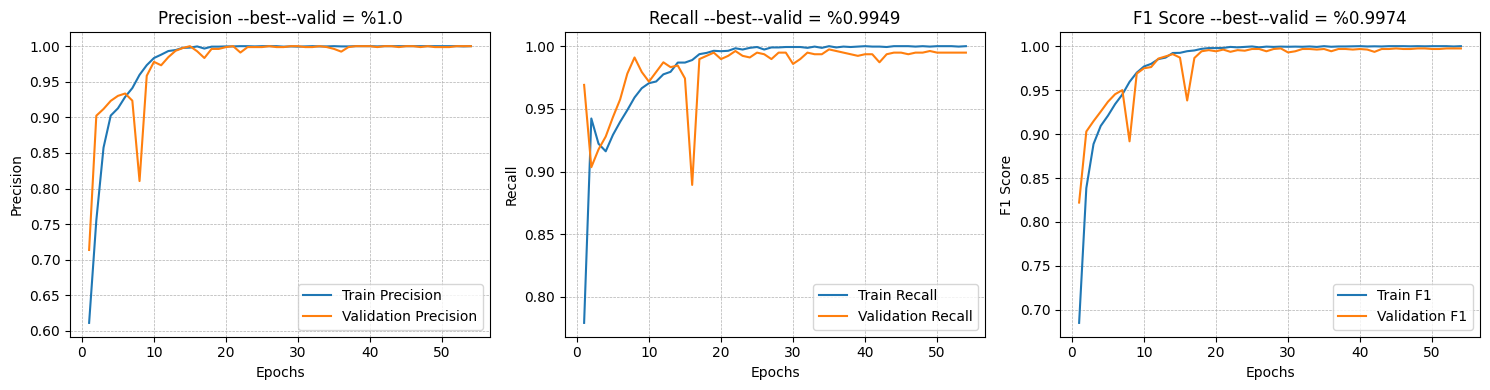

In [11]:
experiment_18.plot_metrics()

Accuracy of the network on the 715 test images: 99.58%
Precision: 1.0000, Recall: 0.9934, F1 Score: 0.9967


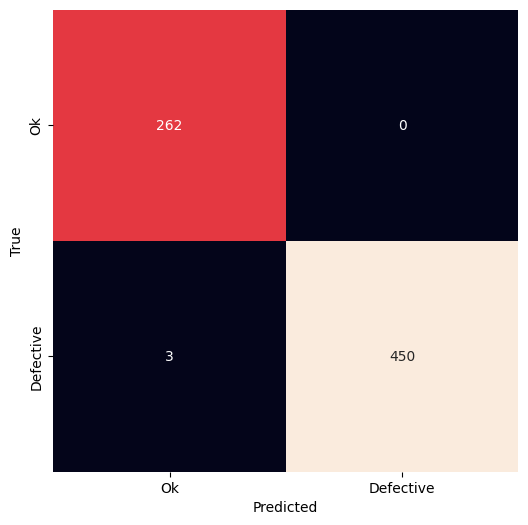

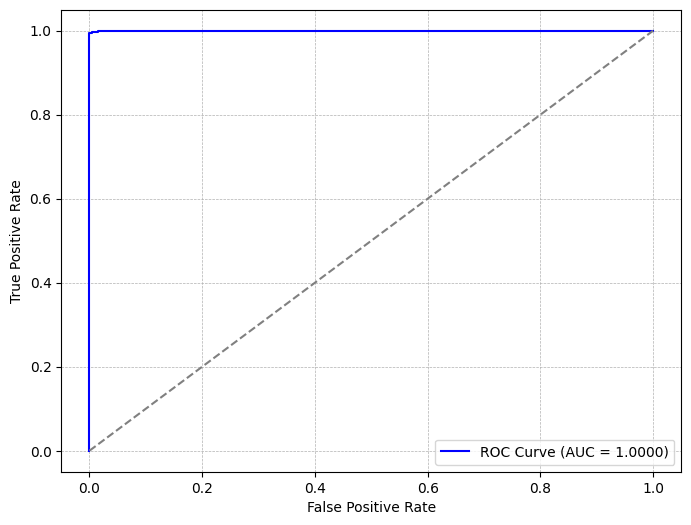

In [12]:
experiment_18.evaluate_model(test_loader=test_loader)

In [13]:
from ResNet.DeepResNet import ResNet50

resnet50 = ResNet50(out_neurons=1).to(device)
experiment_50_dir = "ResNet-50"
experiment_50 = Experiment(experiment_18_dir, resnet50, device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    resnet50.parameters(),
    lr=learning_rate,
    weight_decay=0.001,
    momentum=0.9,
)

summary(
    resnet50,
    input_size=(3, 224, 224),
    device="cuda" if torch.cuda.is_available() else "cpu",
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,160
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,928
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,640
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,640
      BatchNorm2d-14          [-1, 256,

In [14]:
experiment_50.train_model(
    num_epochs,
    criterion,
    optimizer,
    train_loader,
    valid_loader,
    patience,
)

Epoch 1/100: 100%|██████████| 83/83 [00:55<00:00,  1.50batch/s, train_loss=0.677]


Epoch [1/100] | Train Loss: 0.6771, Train Acc: 57.15%, Prec: 0.5758, Rec: 0.9007, F1: 0.7025 | Valid Loss: 0.6575, Valid Acc: 61.16%, Prec: 0.6023, Rec: 0.9923, F1: 0.7496
New --best--validation--loss = 0.65752269 at epoch 0


Epoch 2/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.659]


Epoch [2/100] | Train Loss: 0.6589, Train Acc: 61.92%, Prec: 0.6003, Rec: 0.9634, F1: 0.7397 | Valid Loss: 0.6422, Valid Acc: 63.95%, Prec: 0.6205, Rec: 0.9910, F1: 0.7631
New --best--validation--loss = 0.64217094 at epoch 1


Epoch 3/100: 100%|██████████| 83/83 [00:55<00:00,  1.50batch/s, train_loss=0.637]


Epoch [3/100] | Train Loss: 0.6371, Train Acc: 65.93%, Prec: 0.6289, Rec: 0.9601, F1: 0.7600 | Valid Loss: 0.6217, Valid Acc: 70.97%, Prec: 0.7081, Rec: 0.8584, F1: 0.7760
New --best--validation--loss = 0.62171872 at epoch 2


Epoch 4/100: 100%|██████████| 83/83 [00:56<00:00,  1.47batch/s, train_loss=0.607]


Epoch [4/100] | Train Loss: 0.6072, Train Acc: 71.47%, Prec: 0.6833, Rec: 0.9171, F1: 0.7832 | Valid Loss: 0.5746, Valid Acc: 77.90%, Prec: 0.7756, Rec: 0.8764, F1: 0.8230
New --best--validation--loss = 0.57461517 at epoch 3


Epoch 5/100: 100%|██████████| 83/83 [00:55<00:00,  1.50batch/s, train_loss=0.563]


Epoch [5/100] | Train Loss: 0.5626, Train Acc: 75.30%, Prec: 0.7274, Rec: 0.8960, F1: 0.8029 | Valid Loss: 0.5286, Valid Acc: 76.92%, Prec: 0.7343, Rec: 0.9498, F1: 0.8283
New --best--validation--loss = 0.52855139 at epoch 4


Epoch 6/100: 100%|██████████| 83/83 [00:56<00:00,  1.48batch/s, train_loss=0.507]


Epoch [6/100] | Train Loss: 0.5073, Train Acc: 78.29%, Prec: 0.7665, Rec: 0.8823, F1: 0.8203 | Valid Loss: 0.4662, Valid Acc: 81.22%, Prec: 0.7993, Rec: 0.9073, F1: 0.8499
New --best--validation--loss = 0.46624241 at epoch 5


Epoch 7/100: 100%|██████████| 83/83 [00:56<00:00,  1.48batch/s, train_loss=0.46]


Epoch [7/100] | Train Loss: 0.4604, Train Acc: 80.74%, Prec: 0.7976, Rec: 0.8806, F1: 0.8371 | Valid Loss: 0.4105, Valid Acc: 84.01%, Prec: 0.8281, Rec: 0.9176, F1: 0.8706
New --best--validation--loss = 0.41049579 at epoch 6


Epoch 8/100: 100%|██████████| 83/83 [00:55<00:00,  1.48batch/s, train_loss=0.416]


Epoch [8/100] | Train Loss: 0.4161, Train Acc: 84.08%, Prec: 0.8369, Rec: 0.8900, F1: 0.8626 | Valid Loss: 0.3885, Valid Acc: 85.07%, Prec: 0.8331, Rec: 0.9318, F1: 0.8797
New --best--validation--loss = 0.38851727 at epoch 7


Epoch 9/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.383]


Epoch [9/100] | Train Loss: 0.3833, Train Acc: 85.60%, Prec: 0.8509, Rec: 0.9017, F1: 0.8756 | Valid Loss: 0.3458, Valid Acc: 86.80%, Prec: 0.8468, Rec: 0.9459, F1: 0.8936
New --best--validation--loss = 0.34583633 at epoch 8


Epoch 10/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.343]


Epoch [10/100] | Train Loss: 0.3426, Train Acc: 87.81%, Prec: 0.8760, Rec: 0.9121, F1: 0.8937 | Valid Loss: 0.3059, Valid Acc: 90.72%, Prec: 0.9182, Rec: 0.9241, F1: 0.9211
New --best--validation--loss = 0.30593681 at epoch 9


Epoch 11/100: 100%|██████████| 83/83 [00:55<00:00,  1.48batch/s, train_loss=0.299]


Epoch [11/100] | Train Loss: 0.2992, Train Acc: 89.96%, Prec: 0.8990, Rec: 0.9252, F1: 0.9119 | Valid Loss: 0.2679, Valid Acc: 90.57%, Prec: 0.8900, Rec: 0.9575, F1: 0.9225
New --best--validation--loss = 0.26791722 at epoch 10


Epoch 12/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.241]


Epoch [12/100] | Train Loss: 0.2408, Train Acc: 92.88%, Prec: 0.9331, Rec: 0.9406, F1: 0.9369 | Valid Loss: 0.2271, Valid Acc: 93.36%, Prec: 0.9146, Rec: 0.9781, F1: 0.9453
New --best--validation--loss = 0.22705742 at epoch 11


Epoch 13/100: 100%|██████████| 83/83 [00:55<00:00,  1.50batch/s, train_loss=0.175]


Epoch [13/100] | Train Loss: 0.1751, Train Acc: 94.93%, Prec: 0.9619, Rec: 0.9473, F1: 0.9545 | Valid Loss: 0.1711, Valid Acc: 94.72%, Prec: 0.9316, Rec: 0.9820, F1: 0.9561
New --best--validation--loss = 0.17105672 at epoch 12


Epoch 14/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.13]


Epoch [14/100] | Train Loss: 0.1301, Train Acc: 96.12%, Prec: 0.9750, Rec: 0.9554, F1: 0.9651 | Valid Loss: 0.1373, Valid Acc: 95.78%, Prec: 0.9972, Rec: 0.9305, F1: 0.9627
New --best--validation--loss = 0.13729999 at epoch 13


Epoch 15/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.104]


Epoch [15/100] | Train Loss: 0.1036, Train Acc: 97.10%, Prec: 0.9803, Rec: 0.9678, F1: 0.9740 | Valid Loss: 0.1366, Valid Acc: 94.42%, Prec: 0.9972, Rec: 0.9073, F1: 0.9501
New --best--validation--loss = 0.13656528 at epoch 14


Epoch 16/100: 100%|██████████| 83/83 [00:56<00:00,  1.48batch/s, train_loss=0.077]


Epoch [16/100] | Train Loss: 0.0770, Train Acc: 98.12%, Prec: 0.9932, Rec: 0.9732, F1: 0.9831 | Valid Loss: 0.1563, Valid Acc: 94.65%, Prec: 0.9876, Rec: 0.9202, F1: 0.9527


Epoch 17/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.0593]


Epoch [17/100] | Train Loss: 0.0593, Train Acc: 98.68%, Prec: 0.9916, Rec: 0.9849, F1: 0.9882 | Valid Loss: 0.1053, Valid Acc: 95.55%, Prec: 1.0000, Rec: 0.9241, F1: 0.9605
New --best--validation--loss = 0.10531579 at epoch 16


Epoch 18/100: 100%|██████████| 83/83 [00:55<00:00,  1.50batch/s, train_loss=0.0415]


Epoch [18/100] | Train Loss: 0.0415, Train Acc: 99.32%, Prec: 0.9980, Rec: 0.9899, F1: 0.9939 | Valid Loss: 0.0682, Valid Acc: 98.11%, Prec: 0.9736, Rec: 0.9949, F1: 0.9841
New --best--validation--loss = 0.06824703 at epoch 17


Epoch 19/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.0346]


Epoch [19/100] | Train Loss: 0.0346, Train Acc: 99.38%, Prec: 0.9983, Rec: 0.9906, F1: 0.9944 | Valid Loss: 0.0765, Valid Acc: 97.59%, Prec: 0.9650, Rec: 0.9949, F1: 0.9797


Epoch 20/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.0234]


Epoch [20/100] | Train Loss: 0.0234, Train Acc: 99.62%, Prec: 0.9980, Rec: 0.9953, F1: 0.9966 | Valid Loss: 0.0485, Valid Acc: 98.87%, Prec: 0.9987, Rec: 0.9820, F1: 0.9903
New --best--validation--loss = 0.04847794 at epoch 19


Epoch 21/100: 100%|██████████| 83/83 [00:56<00:00,  1.48batch/s, train_loss=0.0182]


Epoch [21/100] | Train Loss: 0.0182, Train Acc: 99.76%, Prec: 0.9987, Rec: 0.9970, F1: 0.9978 | Valid Loss: 0.0338, Valid Acc: 99.40%, Prec: 0.9987, Rec: 0.9910, F1: 0.9948
New --best--validation--loss = 0.03383401 at epoch 20


Epoch 22/100: 100%|██████████| 83/83 [00:55<00:00,  1.48batch/s, train_loss=0.0136]


Epoch [22/100] | Train Loss: 0.0136, Train Acc: 99.87%, Prec: 0.9993, Rec: 0.9983, F1: 0.9988 | Valid Loss: 0.0707, Valid Acc: 97.66%, Prec: 0.9663, Rec: 0.9949, F1: 0.9803


Epoch 23/100: 100%|██████████| 83/83 [00:55<00:00,  1.50batch/s, train_loss=0.0143]


Epoch [23/100] | Train Loss: 0.0143, Train Acc: 99.89%, Prec: 0.9993, Rec: 0.9987, F1: 0.9990 | Valid Loss: 0.0395, Valid Acc: 98.79%, Prec: 0.9974, Rec: 0.9820, F1: 0.9896


Epoch 24/100: 100%|██████████| 83/83 [00:55<00:00,  1.50batch/s, train_loss=0.00882]


Epoch [24/100] | Train Loss: 0.0088, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0353, Valid Acc: 99.17%, Prec: 0.9987, Rec: 0.9871, F1: 0.9929


Epoch 25/100: 100%|██████████| 83/83 [00:55<00:00,  1.50batch/s, train_loss=0.00557]


Epoch [25/100] | Train Loss: 0.0056, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0283, Valid Acc: 99.40%, Prec: 0.9961, Rec: 0.9936, F1: 0.9948
New --best--validation--loss = 0.02827106 at epoch 24


Epoch 26/100: 100%|██████████| 83/83 [00:56<00:00,  1.47batch/s, train_loss=0.00588]


Epoch [26/100] | Train Loss: 0.0059, Train Acc: 99.98%, Prec: 1.0000, Rec: 0.9997, F1: 0.9998 | Valid Loss: 0.0325, Valid Acc: 99.32%, Prec: 0.9987, Rec: 0.9897, F1: 0.9942


Epoch 27/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.00433]


Epoch [27/100] | Train Loss: 0.0043, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0319, Valid Acc: 99.17%, Prec: 0.9987, Rec: 0.9871, F1: 0.9929


Epoch 28/100: 100%|██████████| 83/83 [00:56<00:00,  1.47batch/s, train_loss=0.00408]


Epoch [28/100] | Train Loss: 0.0041, Train Acc: 99.98%, Prec: 1.0000, Rec: 0.9997, F1: 0.9998 | Valid Loss: 0.0295, Valid Acc: 99.55%, Prec: 0.9987, Rec: 0.9936, F1: 0.9961


Epoch 29/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.00366]


Epoch [29/100] | Train Loss: 0.0037, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0276, Valid Acc: 99.55%, Prec: 0.9987, Rec: 0.9936, F1: 0.9961
New --best--validation--loss = 0.02755364 at epoch 28


Epoch 30/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.00468]


Epoch [30/100] | Train Loss: 0.0047, Train Acc: 99.96%, Prec: 0.9997, Rec: 0.9997, F1: 0.9997 | Valid Loss: 0.0388, Valid Acc: 99.17%, Prec: 0.9974, Rec: 0.9884, F1: 0.9929


Epoch 31/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.0039]


Epoch [31/100] | Train Loss: 0.0039, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0356, Valid Acc: 99.32%, Prec: 0.9987, Rec: 0.9897, F1: 0.9942


Epoch 32/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.00369]


Epoch [32/100] | Train Loss: 0.0037, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0351, Valid Acc: 99.17%, Prec: 0.9987, Rec: 0.9871, F1: 0.9929


Epoch 33/100: 100%|██████████| 83/83 [00:55<00:00,  1.49batch/s, train_loss=0.00239]


Epoch [33/100] | Train Loss: 0.0024, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0284, Valid Acc: 99.47%, Prec: 0.9987, Rec: 0.9923, F1: 0.9955


Epoch 34/100: 100%|██████████| 83/83 [00:55<00:00,  1.48batch/s, train_loss=0.0024]


Epoch [34/100] | Train Loss: 0.0024, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0302, Valid Acc: 99.55%, Prec: 0.9987, Rec: 0.9936, F1: 0.9961


Epoch 35/100: 100%|██████████| 83/83 [00:55<00:00,  1.50batch/s, train_loss=0.00276]


Epoch [35/100] | Train Loss: 0.0028, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0277, Valid Acc: 99.47%, Prec: 0.9974, Rec: 0.9936, F1: 0.9955


Epoch 36/100: 100%|██████████| 83/83 [00:55<00:00,  1.50batch/s, train_loss=0.00292]


Epoch [36/100] | Train Loss: 0.0029, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0323, Valid Acc: 98.72%, Prec: 0.9847, Rec: 0.9936, F1: 0.9891


Epoch 37/100: 100%|██████████| 83/83 [00:55<00:00,  1.50batch/s, train_loss=0.0021]


Epoch [37/100] | Train Loss: 0.0021, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0304, Valid Acc: 99.55%, Prec: 0.9987, Rec: 0.9936, F1: 0.9961


Epoch 38/100: 100%|██████████| 83/83 [00:56<00:00,  1.48batch/s, train_loss=0.00215]


Epoch [38/100] | Train Loss: 0.0021, Train Acc: 100.00%, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Valid Loss: 0.0304, Valid Acc: 99.55%, Prec: 0.9987, Rec: 0.9936, F1: 0.9961
Early stopping triggered at epoch 38.


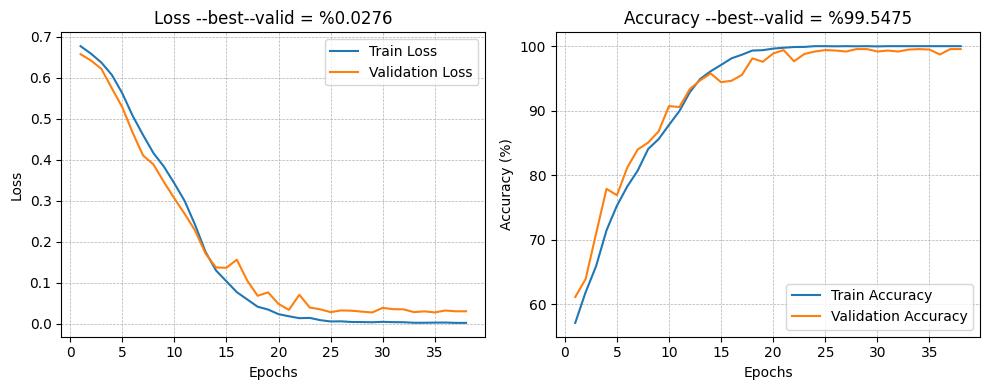

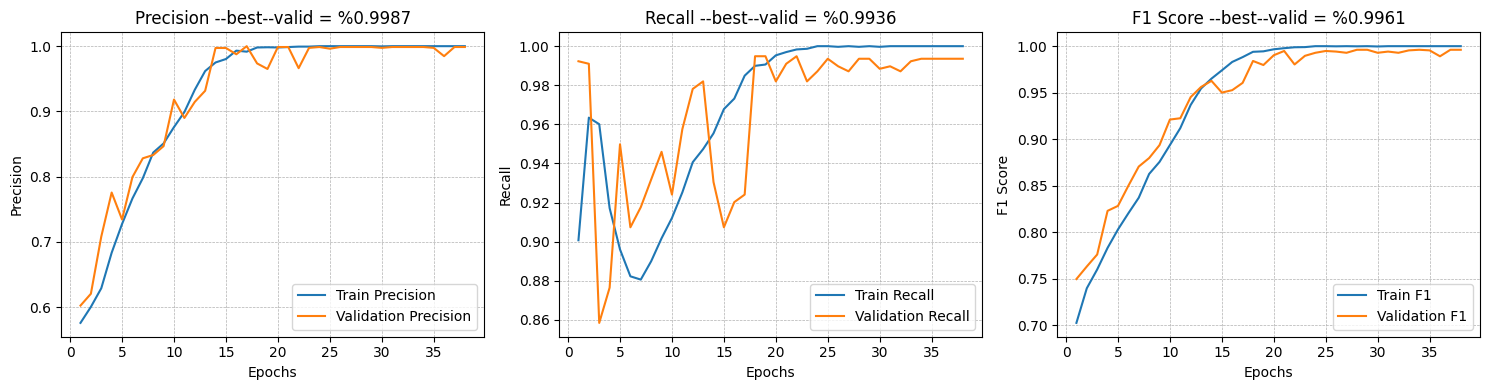

In [15]:
experiment_50.plot_metrics()

Accuracy of the network on the 715 test images: 99.30%
Precision: 1.0000, Recall: 0.9890, F1 Score: 0.9945


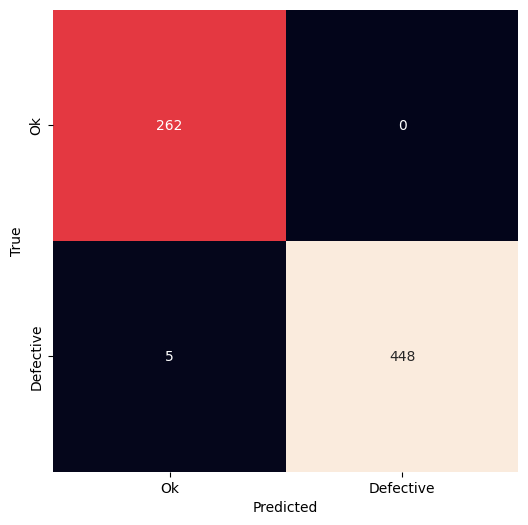

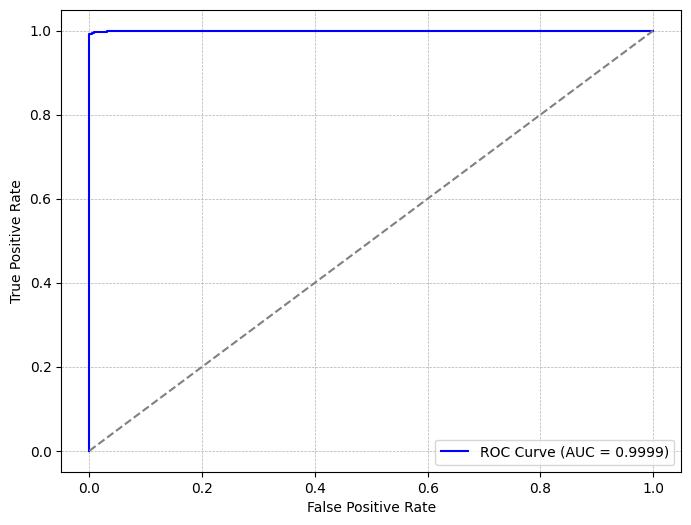

In [16]:
experiment_50.evaluate_model(test_loader=test_loader)